## **Flowers Dataset Experiment**

In [1]:
import os 
import cv2
import numpy as np

path = os.getcwd()+"\\flowers\\"
folderNames = os.listdir(path)

xSample, ySample = [], []

for i, folderName in enumerate(folderNames):
    for j, file in enumerate([f for f in os.listdir(path + folderName)
                            if os.path.isfile(os.path.join(path + folderName, f))]):
        img = cv2.resize(cv2.imread(path + folderName + '/' + file), (100, 100),
                         interpolation=cv2.INTER_LINEAR)/255.
        xSample.append(np.asarray(img))
        ySample.append(i)

xSample = np.array(xSample)
ySample = np.array(ySample)
print(xSample)
print(ySample)

[[[[0.53333333 0.5372549  0.5372549 ]
   [0.57254902 0.57254902 0.57254902]
   [0.58823529 0.58431373 0.58431373]
   ...
   [0.6        0.60784314 0.60784314]
   [0.59607843 0.60392157 0.60392157]
   [0.61176471 0.61176471 0.61176471]]

  [[0.5254902  0.53333333 0.53333333]
   [0.56470588 0.56862745 0.56862745]
   [0.58431373 0.57647059 0.58039216]
   ...
   [0.6        0.60784314 0.60784314]
   [0.59607843 0.60392157 0.60392157]
   [0.59607843 0.59607843 0.59607843]]

  [[0.49803922 0.51372549 0.51764706]
   [0.53333333 0.54117647 0.54509804]
   [0.56470588 0.57254902 0.57254902]
   ...
   [0.6        0.60784314 0.60784314]
   [0.59215686 0.6        0.6       ]
   [0.58431373 0.58431373 0.58431373]]

  ...

  [[0.09803922 0.18039216 0.16862745]
   [0.09411765 0.17647059 0.16470588]
   [0.09803922 0.18431373 0.17254902]
   ...
   [0.48627451 0.49019608 0.50588235]
   [0.47058824 0.4745098  0.49019608]
   [0.48627451 0.49019608 0.50588235]]

  [[0.10196078 0.18431373 0.17254902]
   [0.1

In [2]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(xSample, ySample, test_size=0.10, random_state=0)
xTrain, xVal, yTrain, yVal = train_test_split(xTrain, yTrain, test_size=0.111, random_state=0)

print(xTrain.shape)
print(xTest.shape)
print(xVal.shape)

(3453, 100, 100, 3)
(432, 100, 100, 3)
(432, 100, 100, 3)


In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

history = model.fit(xTrain, yTrain, epochs=100, validation_data=(xVal, yVal))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 100)       2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 100)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 49, 49, 100)      400       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       90100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                             
                                                        

c:\Users\koray\anaconda3\envs\neuralnetworks\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


108/108 [==============================] - 28s 92ms/step - loss: 3.5089 - accuracy: 0.3078 - val_loss: 1.6742 - val_accuracy: 0.2616
Epoch 2/100
108/108 [==============================] - 8s 70ms/step - loss: 2.1111 - accuracy: 0.3417 - val_loss: 1.6793 - val_accuracy: 0.2616
Epoch 3/100
108/108 [==============================] - 8s 70ms/step - loss: 1.6007 - accuracy: 0.3875 - val_loss: 1.4866 - val_accuracy: 0.3079
Epoch 4/100
108/108 [==============================] - 8s 70ms/step - loss: 1.4402 - accuracy: 0.4136 - val_loss: 1.4794 - val_accuracy: 0.3866
Epoch 5/100
108/108 [==============================] - 8s 70ms/step - loss: 1.3698 - accuracy: 0.4454 - val_loss: 1.3296 - val_accuracy: 0.4144
Epoch 6/100
108/108 [==============================] - 8s 70ms/step - loss: 1.3104 - accuracy: 0.4524 - val_loss: 1.1915 - val_accuracy: 0.5000
Epoch 7/100
108/108 [==============================] - 8s 72ms/step - loss: 1.2481 - accuracy: 0.4886 - val_loss: 1.1469 - val_accuracy: 0.5648
Epo

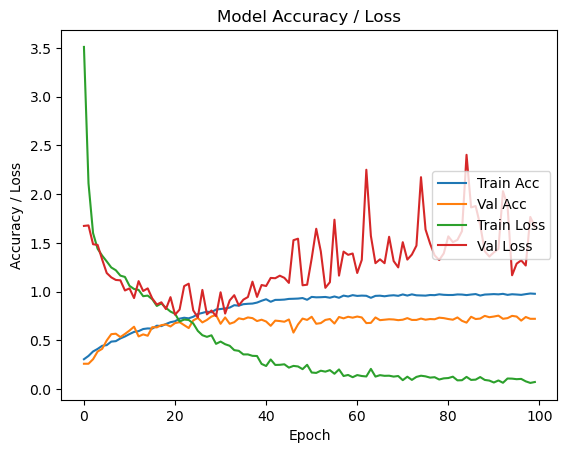

In [4]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Accuracy / Loss')
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')

plt.legend(['Train Acc', 'Val Acc', 'Train Loss', 'Val Loss'], loc='center right')
plt.show()

14/14 [==============================] - 1s 36ms/step
              precision    recall  f1-score   support

           0       0.76      0.70      0.73        81
           1       0.79      0.66      0.72        88
           2       0.48      0.69      0.56        71
           3       0.77      0.82      0.79        77
           4       0.72      0.62      0.66       115

    accuracy                           0.69       432
   macro avg       0.70      0.70      0.69       432
weighted avg       0.71      0.69      0.69       432



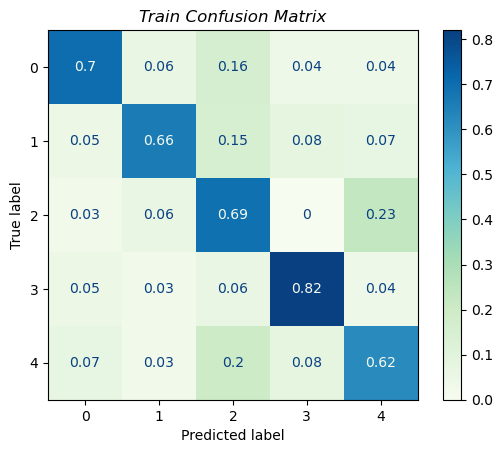

In [5]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

yTestPred = model.predict(xTest)
yTestPred = np.argmax(yTestPred, axis=1)
#yTest = np.asarray(yTest)
print(classification_report(yTest, yTestPred))

cm = confusion_matrix(yTest, yTestPred, normalize='true').round(2)
# cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# cmn = cmn.round(2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.GnBu, values_format='g')

plt.title(f'Train Confusion Matrix', style='italic')
# plt.savefig(f'Model2_CM_8901_{self.header}_Data_Son.jpg)
plt.show()